### QUESTION 2
Implement Ridge regression also known as L2 regularisation and plot graph between regularisation coefficient λ and error

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../input_data/AdmissionDataset/data.csv")
df_r , df_c = dataset.shape
target = 'Chance of Admit '


In [3]:
dataset = dataset.drop(['Serial No.'], axis=1)

In [4]:
def normalise(df):
    global target
    cols = df.columns
    for c in cols:
        if c != target:
            sd = df[c].std()
            mean = df[c].mean()
            
            df[c] = (df[c] - mean)/sd
    return df
dataset = normalise(dataset)

In [5]:
# dataset = dataset.sample(frac=1)
train, validate = np.split(dataset, [int(.8*len(dataset))])

Compute feature matrix X

In [6]:
def makeX(df):
    if target in df.columns:
        df = df.drop([target], axis=1)
    X = df.values
    X = np.insert(X, 0, values=1, axis=1)
#     print "row: ",X.shape[0], "cols: ",X.shape[1]
    return X
    
train_mat = makeX(train)
validate_mat = makeX(validate)

In [7]:
def initTheta(n):
    theta = np.zeros(n - 2 + 1) #remove chance of admit, serial no. add 1 b0 col
    return theta

#### RIDGE

$$Cost = \Sigma( y_i - \Sigma \beta_{j} x_{ij} )^2 + \lambda \Sigma w_{j}^2 $$

$$\theta_0 := \theta_0 - \alpha . 1/m \Sigma (h_\theta (x ^ {(i)} ) - y ^{(i)} ) x_0 ^ {(i)}$$
$$\theta_j := \theta_j - \alpha.1/m \Sigma (h_\theta (x ^ {(i)} ) - y ^{(i)} ) x_j ^ {(i)} - \alpha *\lambda *w_j /m$$

In [8]:
def gradientDescent(mat, actual, alpha, lmbda, iterations):
  
    theta = initTheta(df_c) #df_c: no of columns in original dataframe
    m = len(mat)
    for i in range(0, iterations):
        pred =  np.dot(mat, theta)
        error = np.array(pred - actual)
        gradient =  np.dot(error, mat[:,0])/m
        theta[0] = theta[0] - alpha*gradient

        for j in range(1, len(theta)):
            gradient =  np.dot(error, mat[:,j])/m
            
            coeff = (lmbda * (theta[j]))/m
            
            gradient += coeff
            theta[j] -= alpha*gradient
            
    return theta

In [9]:
lambda_list = np.arange(0.1,100,2)
# print len(lambda_list)

log_lambda_list = []
for lmbda in lambda_list:
    log_lambda_list.append(np.log(lmbda))
# print len(log_lambda_list)

In [10]:
from sklearn.metrics import mean_squared_error #true, pred

In [11]:
def costFunc(true, pred, theta, lmbda):   
    loss = pred - true
    squared_error = np.sum((loss)**2)
    
    cost = squared_error + lmbda*np.sum(np.dot(theta.T, theta))
    
    return cost

In [12]:
alpha = 0.001
iterations = 1000

In [13]:
val_cost_list, train_cost_list = [], []
theta_list = []
val_mse_list, train_mse_list = [], []
for idx in range(len(lambda_list)):
    
    theta = gradientDescent(train_mat, train[target], alpha, lambda_list[idx], iterations)
    theta_list.append(theta)
    
    val_pred = np.dot(validate_mat, theta)
    train_pred = np.dot(train_mat, theta)
    train_mse = mean_squared_error(train[target],train_pred)
    val_mse = mean_squared_error(validate[target],val_pred)
    train_cost = costFunc(train[target],train_pred, theta, lambda_list[idx])
    val_cost = costFunc(validate[target],val_pred, theta, lambda_list[idx])
    val_cost_list.append(val_cost); val_mse_list.append(val_mse)
    train_mse_list.append(train_mse); train_cost_list.append(train_cost)
#     print "cost: ",cost

Text(0,0.5,'Cost')

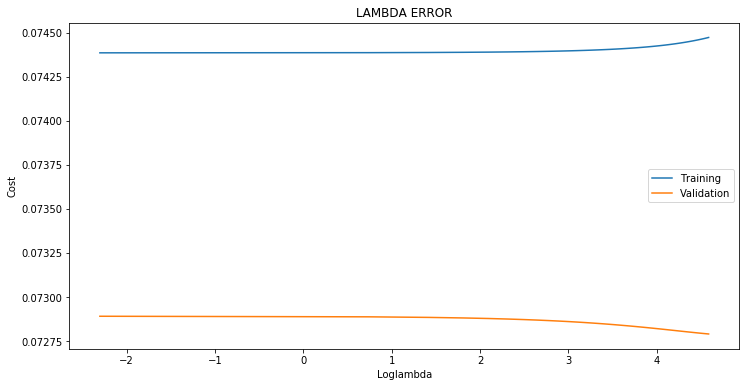

In [14]:
fig, axes = plt.subplots(figsize=(12, 6))
plt.title('LAMBDA ERROR')
axes.plot(log_lambda_list,train_mse_list, label='Training')
axes.plot(log_lambda_list,val_mse_list,label='Validation')
axes.legend(loc='best')
# axes.plot(log_l,train_err, label = 'training')
plt.xlabel('Loglambda')
plt.ylabel('Cost')


Text(0,0.5,'Cost')

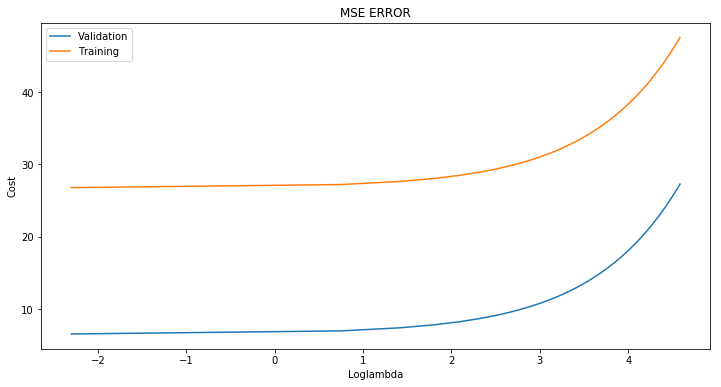

In [15]:
fig, axes = plt.subplots(figsize=(12, 6))
plt.title('MSE ERROR')
axes.plot(log_lambda_list,val_cost_list, label = 'Validation')
axes.plot(log_lambda_list,train_cost_list, label = 'Training')
# axes.plot(log_l,train_err, label = 'training')
axes.legend(loc='best')
plt.xlabel('Loglambda')
plt.ylabel('Cost')

### QUESTION - 4

Text(0,0.5,'Weight')

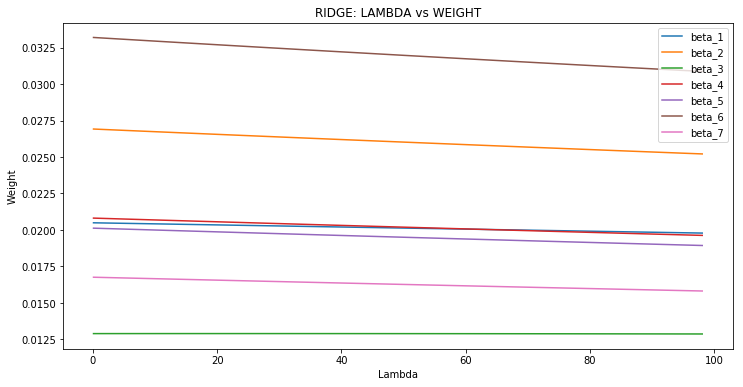

In [16]:
b0,b1,b2,b3,b4,b5,b6,b7 = ([] for i in range(8))
for i in range(len(theta_list)):
    b0.append(theta_list[i][0])
    b1.append(theta_list[i][1])
    b2.append(theta_list[i][2])
    b3.append(theta_list[i][3])
    b4.append(theta_list[i][4])
    b5.append(theta_list[i][5])
    b6.append(theta_list[i][6])
    b7.append(theta_list[i][7])
    

fig, axes = plt.subplots(figsize=(12, 6))
plt.title('RIDGE: LAMBDA vs WEIGHT')
# axes.plot(lambda_list,b0, label = 'beta_0')
axes.plot(lambda_list,b1, label = 'beta_1')
axes.plot(lambda_list,b2, label = 'beta_2')
axes.plot(lambda_list,b3, label = 'beta_3')
axes.plot(lambda_list,b4, label = 'beta_4')
axes.plot(lambda_list,b5, label = 'beta_5')
axes.plot(lambda_list,b6, label = 'beta_6')
axes.plot(lambda_list,b7, label = 'beta_7')

axes.legend(loc='best')
plt.xlabel('Lambda')
plt.ylabel('Weight')